In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns



In [3]:
df=pd.read_csv("/content/drive/MyDrive/6th SEM/IAFSM/Regression/Medical Price Dataset.csv")
#print(np.sum(df.isna()))
df['sex']=df['sex'].map({'female':1,'male':0})     # mapping the data in discrete numbers
df['region']=df['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})   
df['smoker']=df['smoker'].map({'yes':1,'no':0})
data=df[['smoker','age','sex','bmi','children','region','charges']]




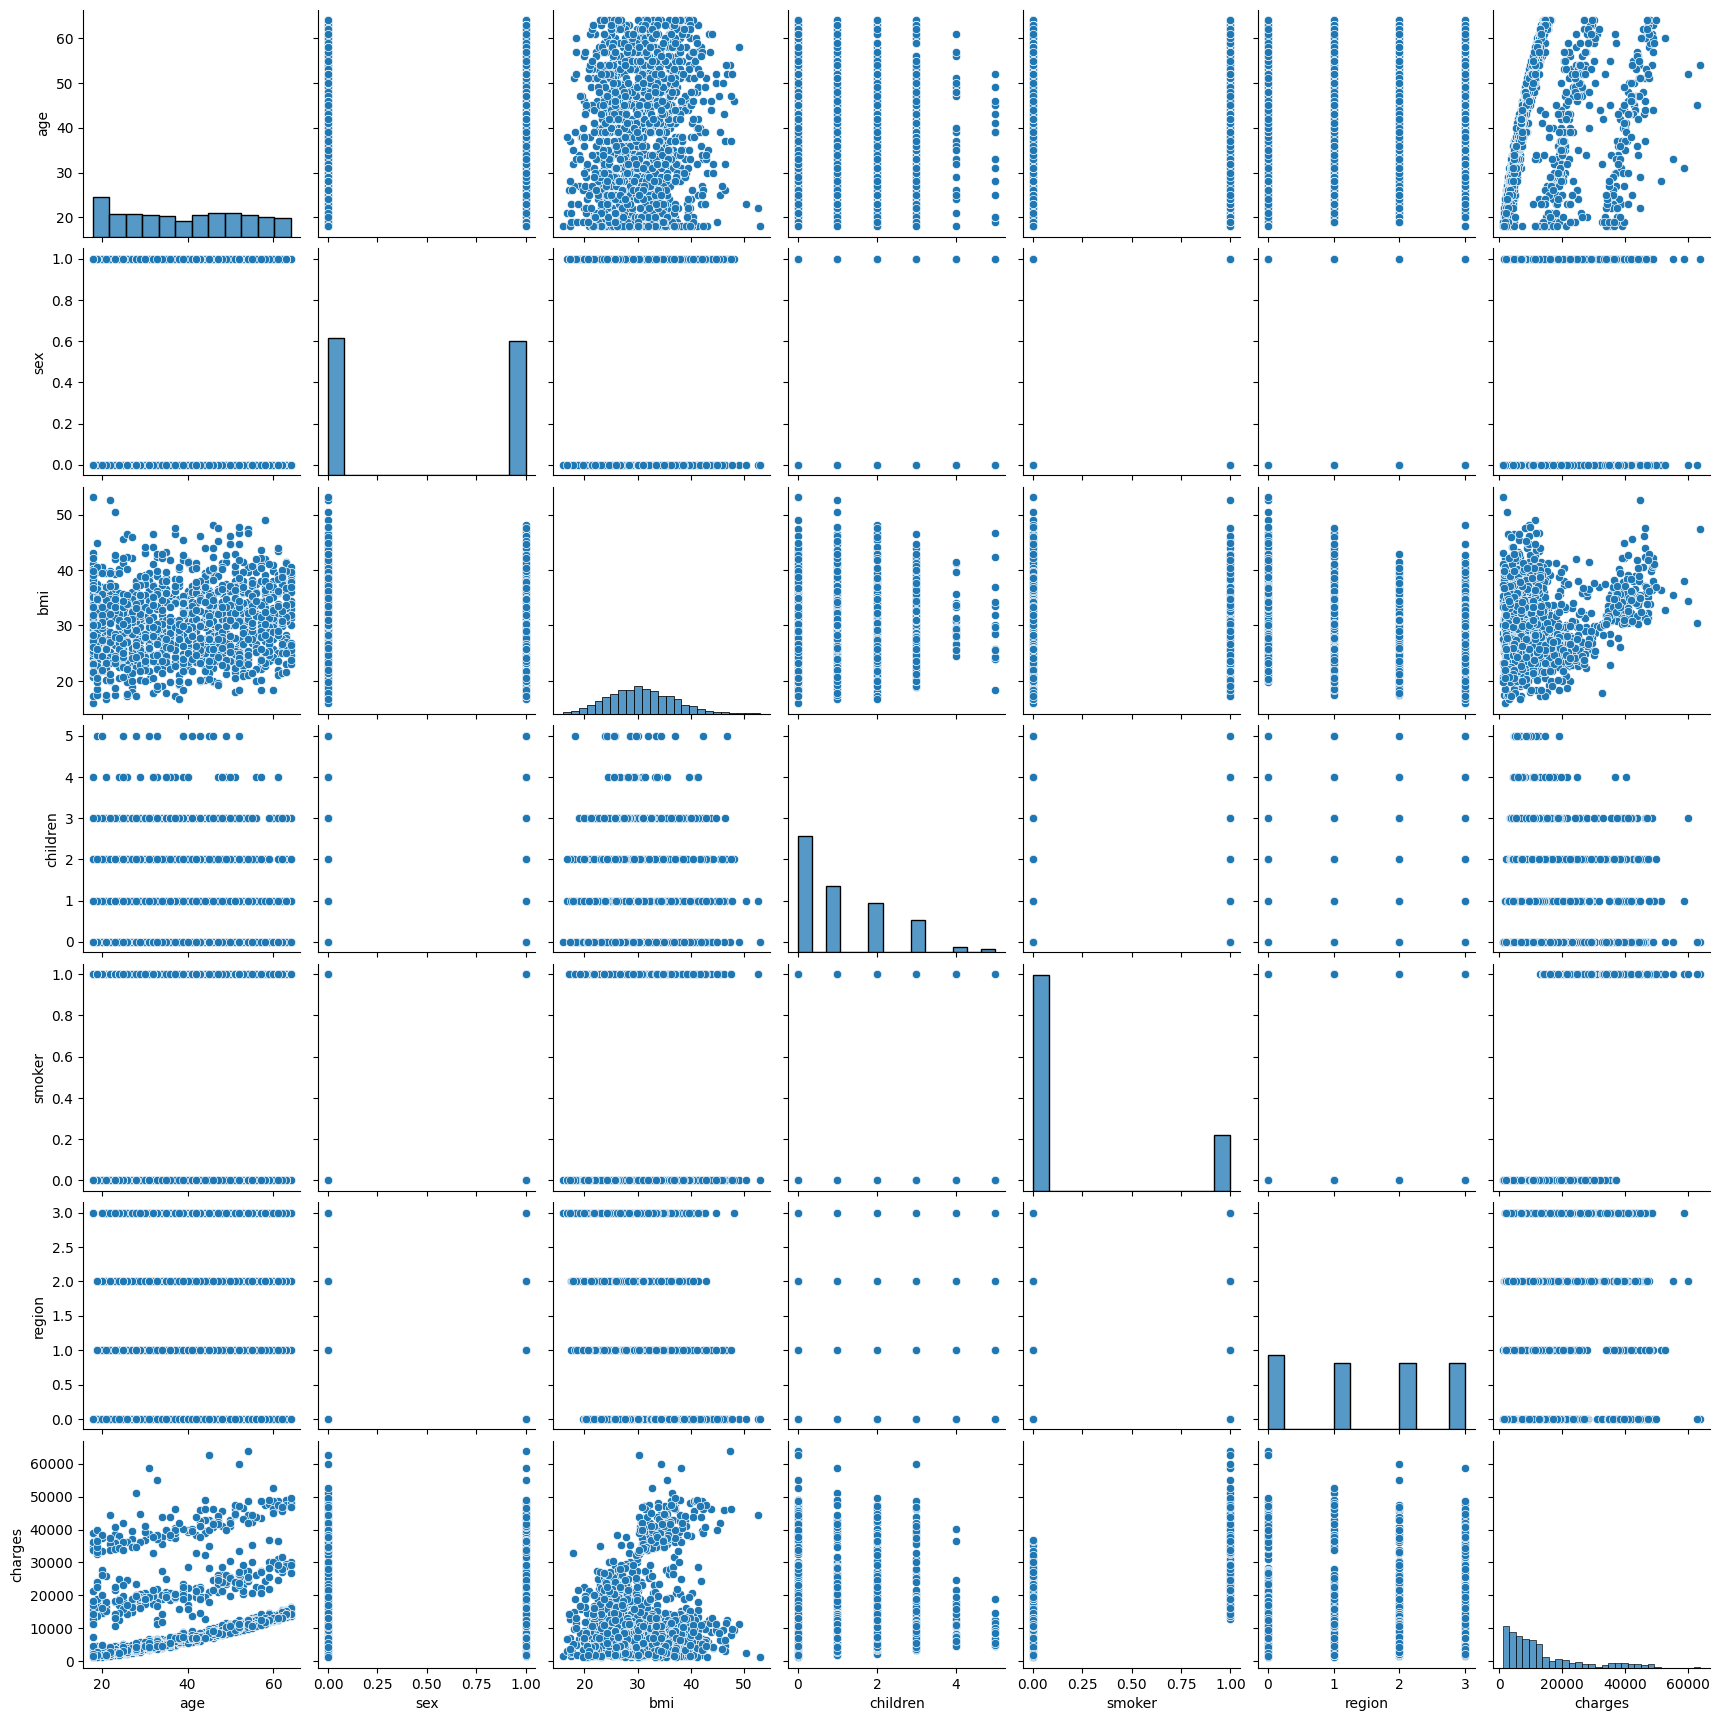

In [9]:
sns.pairplot(df)

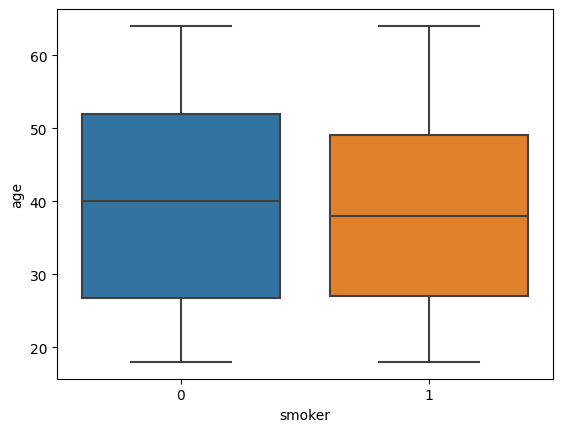

In [12]:
sns.boxplot(x="smoker", y="age", data=df )
plt.show()

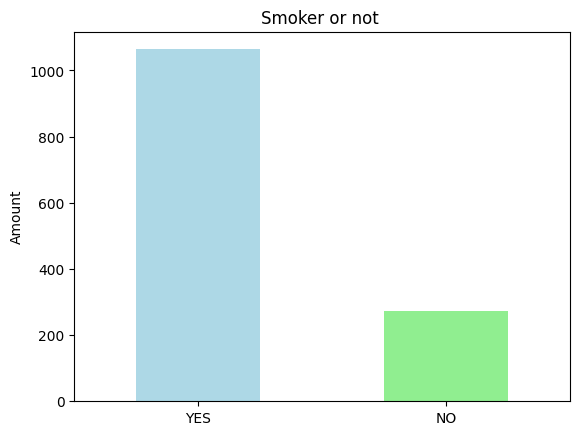

In [13]:
fig = df.smoker.value_counts().plot(kind = 'bar', color=["lightblue", 'lightgreen']) 
fig.set_xticklabels(labels=['YES', "NO"], rotation=0)
plt.title("Smoker or not ") 
plt.ylabel("Amount");

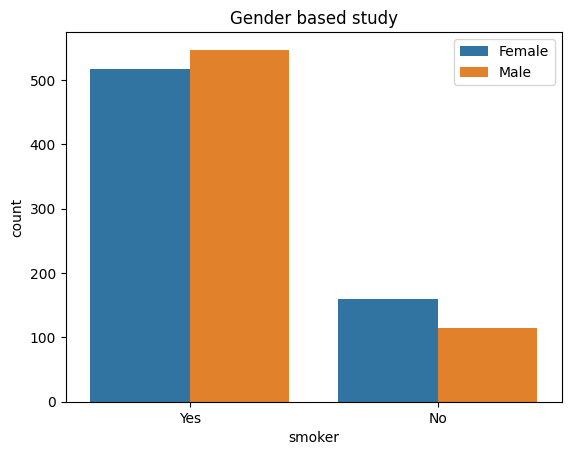

In [14]:
fig = sns.countplot(x = 'smoker', data = df, hue = 'sex')    
fig.set_xticklabels(labels=["Yes", 'No'], rotation=0) #x axis labelling 
plt.legend(['Female', 'Male'])  #naming legend
plt.title("Gender based study"); # title giving

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


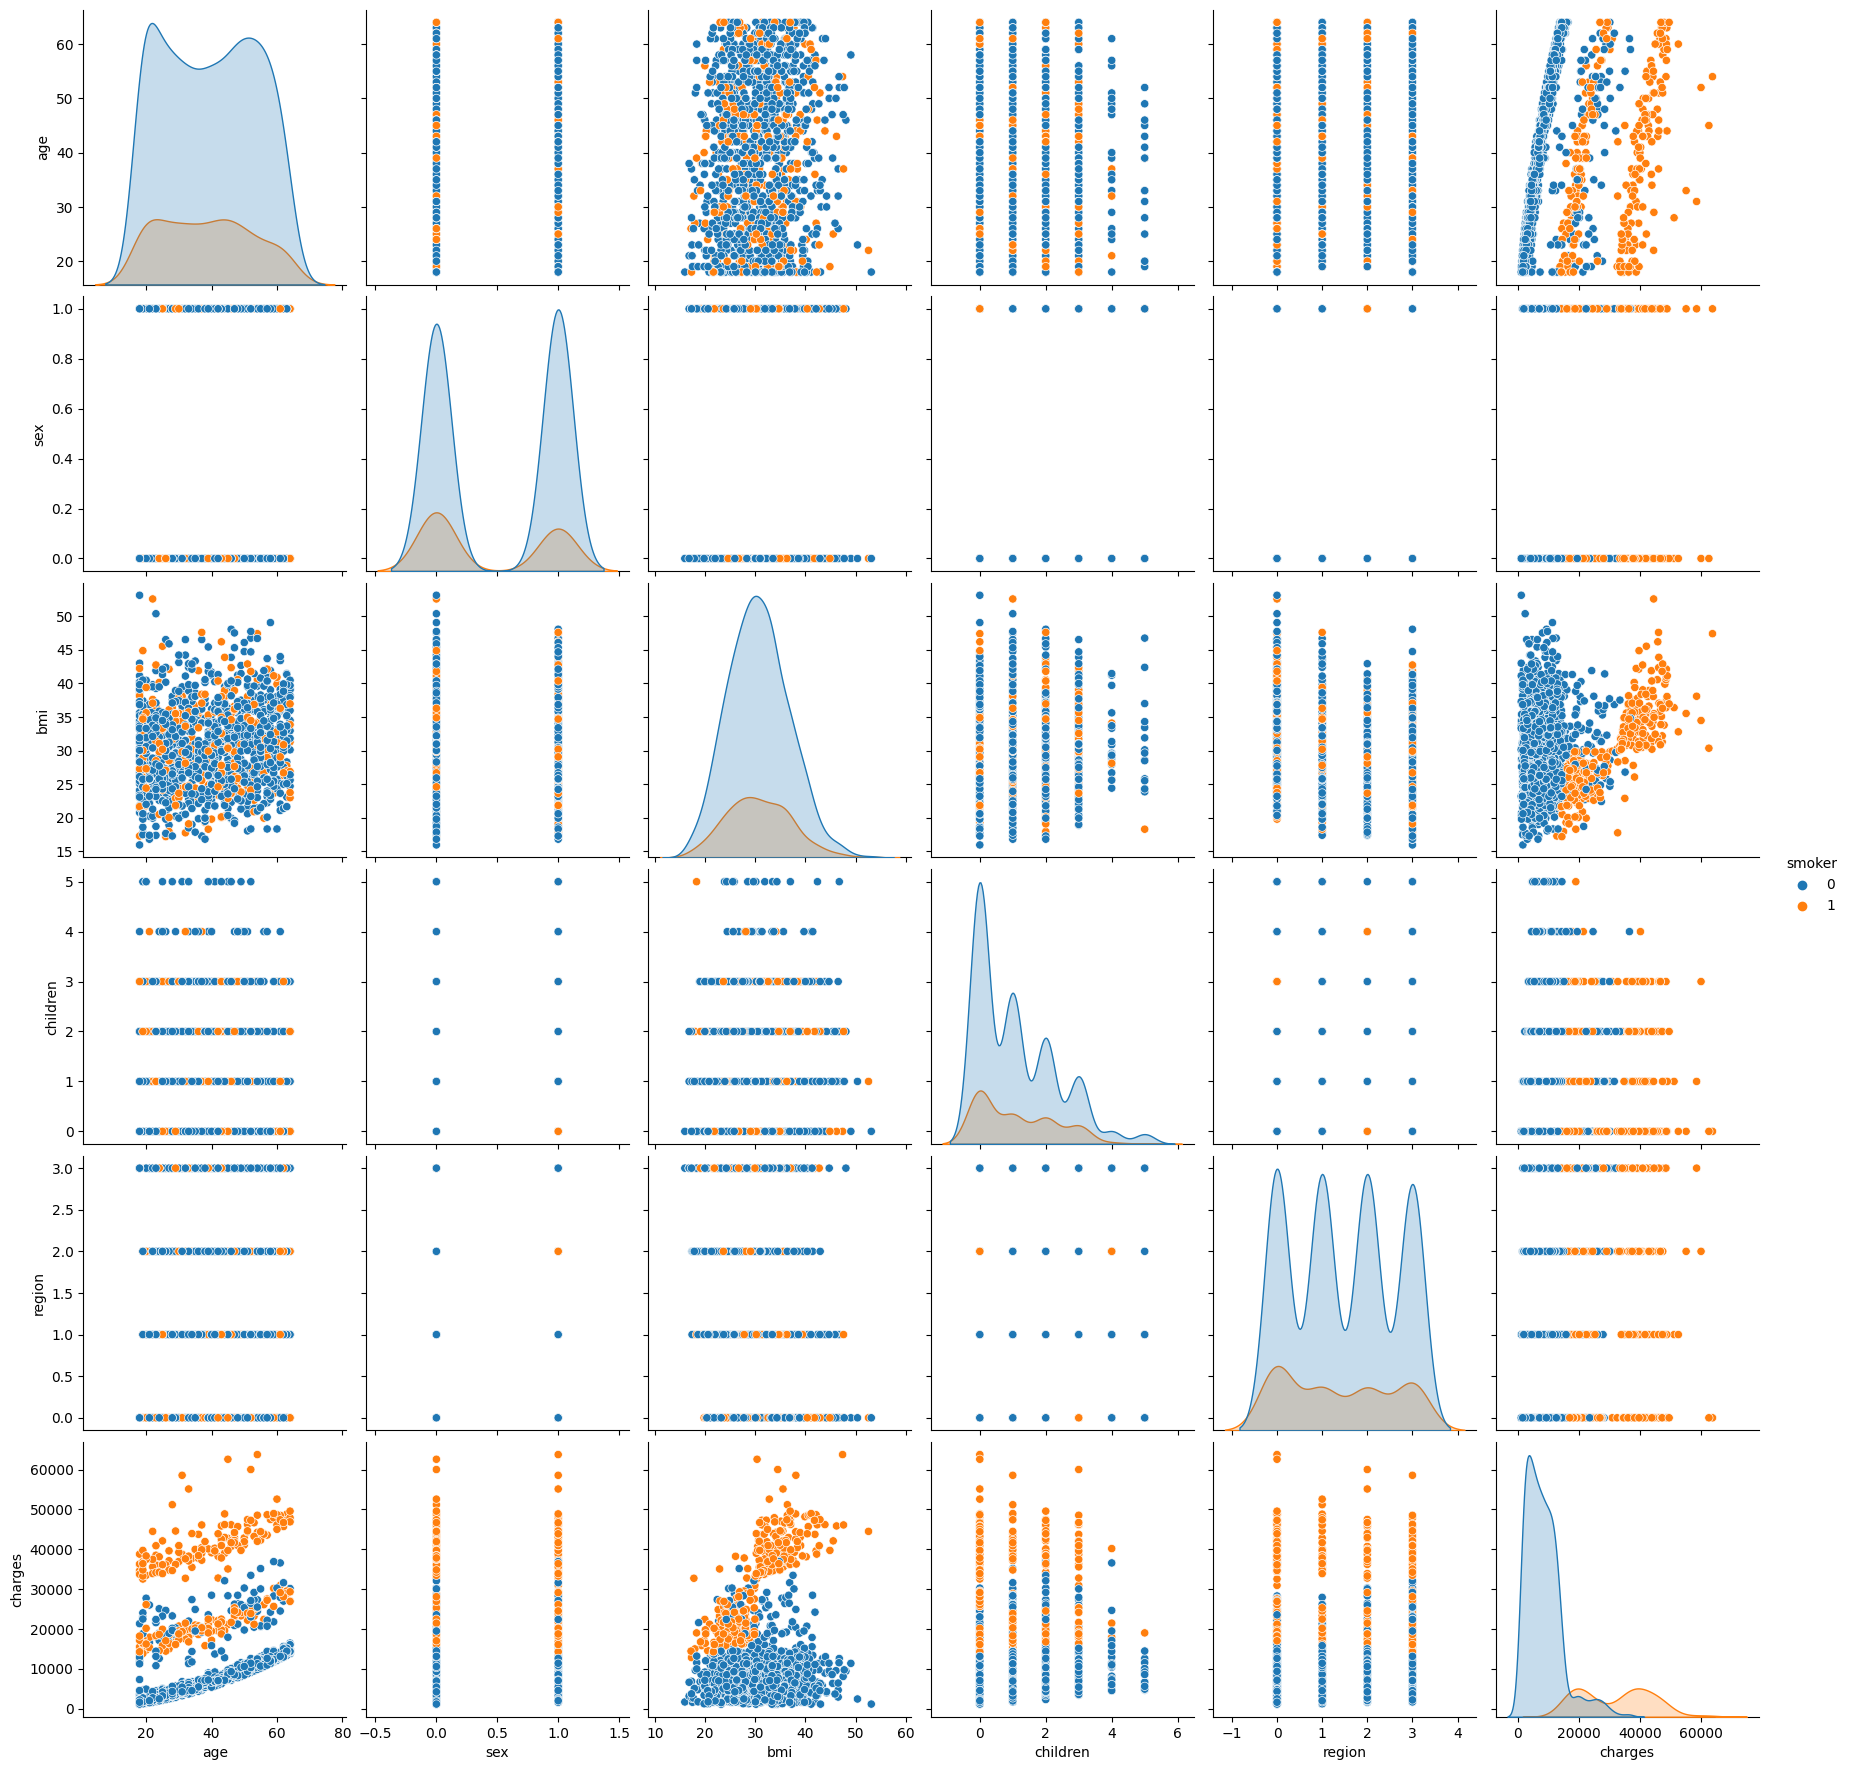

In [16]:
sns.pairplot(df, hue="smoker", size=3, diag_kind="kde")
plt.show()

In [4]:
train=df[:(int((len(data)*0.8)))]  #dividing train and test data
test=df[(int((len(data)*0.8))):]
total=data.shape

print("train",train.shape)
print("test",test.shape)
print("total",data.shape)



train (1070, 7)
test (268, 7)
total (1338, 7)


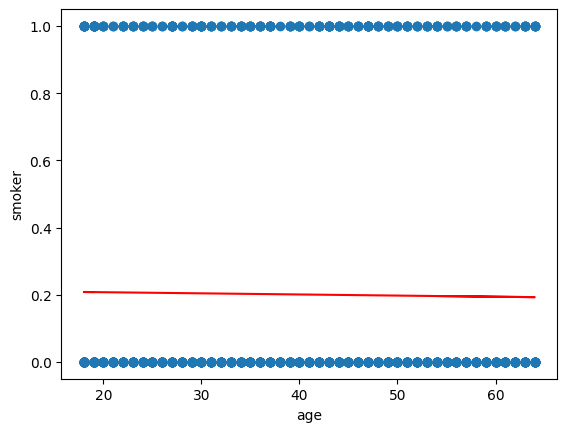

[0.20178846591825592, 0.1930869560846003, 0.20714324120050553, 0.19609901718086573, 0.1940909764500221, 0.20346183319395894, 0.19844173136684992, 0.20714324120050553, 0.20480052701452134, 0.1930869560846003, 0.20814726156592733, 0.20346183319395894, 0.20145379246311532, 0.20346183319395894, 0.1934216295397409, 0.20111911900797472, 0.19576434372572513, 0.1950949968154439, 0.19676836409114692, 0.19542967027058453, 0.19844173136684992, 0.19576434372572513, 0.20647389429022434, 0.20680856774536494, 0.19743771100142812, 0.20814726156592733, 0.19710303754628752, 0.20680856774536494, 0.19676836409114692, 0.20580454737994314, 0.20312715973881834, 0.19643369063600633, 0.20446585355938074, 0.1947603233603033, 0.20178846591825592, 0.19609901718086573, 0.19777238445656872, 0.19743771100142812, 0.20546987392480254, 0.19911107827713112, 0.19609901718086573, 0.20145379246311532, 0.19810705791170932, 0.20480052701452134, 0.20647389429022434, 0.19576434372572513, 0.20044977209769352, 0.2058045473799431

In [19]:
def slr(i, o):
    x = i  # Assign the value of the input parameter 'i' to the variable 'x'
    y = o  # Assign the value of the input parameter 'o' to the variable 'y'

    # Calculate the sum of the element-wise multiplication between 'y' and 'x'
    s_yx = (y * x).sum()

    # Calculate the product of the sum of 'y' and the sum of 'x', divided by the length of 'x'
    yx_byn = (y.sum() * x.sum()) / len(x)

    # Calculate the sum of the squares of each element in 'x'
    s_xx = (x * x).sum()

    # Calculate the square of the sum of 'x', divided by the length of 'x'
    xx_byn = ((x.sum()) ** 2) / len(x)

    # Calculate the slope of the regression line
    slope = (s_yx - yx_byn) / (s_xx - xx_byn)

    # Calculate the intercept of the regression line
    intercept = (y.mean()) - slope * (x.mean()) 
    return intercept,slope

t_i, t_s = slr(train['age'], train['smoker']) #- Assuming the function 'slr' returns the intercept and slope values of the regression line, this line calculates the intercept and slope using the 'age' column as the independent variable and the 'smoker' column as the dependent variable. The calculated values are assigned to the variables 't_i' and 't_s'.

# Scatter plot of 'age' vs 'smoker'
plt.scatter(train['age'], train['smoker'])

# Plot the regression line using the calculated slope and intercept
plt.plot(train['age'], t_s * train['age'] + t_i, '-r')

# Set the x-axis label
plt.xlabel("age")

# Set the y-axis label
plt.ylabel("smoker")

# Display the plot
plt.show()


def test(t,intercept,slope):
    return (t*slope)+intercept
t_y=[]   
x=data['age'].values
for i in range(train.shape[0],total[0]):
    test_y=test(x[i],t_i,t_s)
    t_y.append(test_y)
print(t_y)

In [20]:

a_y = data['smoker'].values[train.shape[0]:total[0]]
p_y= np.array(t_y)
mse = np.mean((a_y - p_y) ** 2)
rmse = np.sqrt(mse)
accuracy = 1 - rmse
print("Accuracy:", accuracy)


Accuracy: 0.5855434808878117


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
